In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import jit

In [2]:
def laguerre(n,alpha,x):
#LAGUERRE Compute the LAGUERRE polynomial of degree n.
# h = laguerre(n, alpha, x) returns the laguerre polynomial
# of degree n, alpha in x.


#Check whether n is a non-negative integer
    if np.logical_or(round(n)- n!= 0, n < 0):
        #return print('n must be a positive integer')
        raise ValueError('n must be a positive integer') 
    
# Set up a vector of the same size as final vecto
    lp = np.zeros(n+1)
    
# if either of the first 2 laguerre polynomials just state them
    if n==0:
        lp = np.ones(1)
    elif n== 1:
        lp = [alpha+1.0,-1.0]
    elif n>1:
        lp_l = np.zeros(n+1)
        lp_u = np.zeros(n+1)
        lp_l[0] = 1.0
        lp_u[0] = alpha + 1
        lp_u[1] = -1
        for ii in range(2, n+1): 
            lp = (2+(alpha-1)/ii)*lp_u-1/ii*np.concatenate(([0],lp_u[0:n])) -(1+(alpha-1)/ii)*lp_l;
            # Remember with indice addressing this mean from 0 to less than n
            # Now reset the polynomials
            lp_l = lp_u.copy()
            lp_u = lp.copy()
    lp = np.flipud(lp)
 # Now evaluate full vector h(n,x)
    res = np.polyval(lp,x)
    return res

In [3]:
def lagurre_direct(n, alpha,x):
    # Recursive direct calculation method
    
    if n == 0:
        return np.ones(len(x))
    elif n == 1:
        return -x + alpha + 1
    else:
        Ln_2 = 1
        Ln_1 = -x + alpha + 1
        
        for i in range(2,n+1):
            Ln = (2 + (alpha-1-x)/i)*Ln_1 - (1 + (alpha-1)/i)*Ln_2
            Ln_2 = Ln_1
            Ln_1 = Ln
            
        return Ln


In [4]:
def lagurre_call(n,a,x):
#simple if else if for n=0 and n=1
    if(n==0):
        return 1
    elif(n==1):
        return -x+a+1
#then use reccurence relation for L(n,a,x) if n =/= 0 or 1
    else:
        return (2+(a-1-x)/n)*lagurre_call(n-1,a,x)-(1+(a-1)/n)*lagurre_call(n-2,a,x)


In [5]:
def lagurre_alt(order,alpha,x):
    if order==0:
        L=np.ones([1,len(x)])
    elif order==1:
        L=np.array([-x+alpha+1])
    else:
        l0=np.ones([1,len(x)])
        l1=np.array([-x+alpha+1])
        #store the solution to n-2 in the 0th element and the n-1 in the -1 element (or 1)
        Lprevious=[l0,l1]  # Note this is using a list
        for i in np.arange(0,(order)-1):
            L=(2+(alpha-1-x)/(i+2.0))*Lprevious[-1][:]-(1+(alpha-1)/(i+2.0))*Lprevious[0][:]
            Lprevious.append(L)    # This is ammending a list
            Lprevious.pop(0)   # This removes the lowest order element in a list
    return L[0]


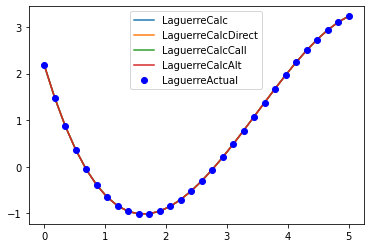

In [6]:
# First check all of the codes give the correct answer by plotting the 3 order
alpha = 0.5
n = 3 
x_v = np.linspace(0,5,30)
test_actual = -x_v**3/6+((alpha+3)*x_v**2)/2-(alpha+2)*(alpha + 3)*x_v/2+(alpha+1)*(alpha+2)*(alpha+3)/6
test = laguerre(n,alpha,x_v)
test1 = lagurre_direct(n, alpha, x_v)
test2 = lagurre_call(n,alpha,x_v)
test3 = lagurre_alt(n,alpha,x_v)
plt.figure(1)
plt.plot(x_v,test,label = 'LaguerreCalc')
plt.plot(x_v,test1,label = 'LaguerreCalcDirect')
plt.plot(x_v,test2,label = 'LaguerreCalcCall')
plt.plot(x_v,test3,label = 'LaguerreCalcAlt')
plt.plot(x_v,test_actual,'bo',label = 'LaguerreActual')
plt.legend()

In [38]:
ntest = 50
x_v_test = np.linspace(0,1,int(1e6))
alpha = 1

In [8]:
%%timeit -n 3 -r 10
laguerre(ntest,alpha,x_v_test)

289 ms ± 10.9 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)


In [9]:
%%timeit -n 3 -r 10
lagurre_direct(ntest,alpha,x_v_test)

826 ms ± 18 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)


In [10]:
%%timeit -n 3 -r 10
lagurre_alt(ntest,alpha,x_v_test)

817 ms ± 7.37 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)


In [11]:
%%timeit -n 3 -r 1
ntest_short = 10
lagurre_call(ntest_short,alpha,x_v_test)

1.82 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
